https://coding-bootcamps.notion.site/Holiday-Mood-Tracker-2c46ed1efc938057be5fc3181d44f7f2

In [381]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [382]:
!pip install catboost

In [383]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [384]:
try:
    df = pd.read_csv('/content/drive/MyDrive/December Code Jam/Daylio_Abid.csv')
except:
    df = pd.read_csv('dataset.csv')

In [385]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


### Data Cleaning/ Preprocessing

In [386]:
#df['full_date'] = pd.to_datetime(df['full_date'], format='%d/%m/%Y')
df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )

not_needed_date_columns = ['full_date', 'time', 'date']
df.drop(columns=not_needed_date_columns, inplace=True)

/tmp/ipython-input-2562534138.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['full_date'] + ' ' + df['time'] )


In [387]:
df.set_index('datetime', inplace=True)

df = df.sort_index(ascending=False)

In [388]:
print(df.index.is_monotonic_decreasing)

True


In [389]:
print(df.index.is_monotonic_increasing)

False


In [390]:
df.isna().sum()

,0
weekday,0
sub_mood,0
activities,47
mood,0


In [391]:
df.shape

(940, 4)

In [392]:
df.dropna(inplace=True)

df.isna().sum()

,0
weekday,0
sub_mood,0
activities,0
mood,0


In [393]:
df.duplicated().sum()

np.int64(1)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 893 entries, 2021-12-04 21:52:00 to 2018-01-03 12:20:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   weekday     893 non-null    object
 1   sub_mood    893 non-null    object
 2   activities  893 non-null    object
 3   mood        893 non-null    object
dtypes: object(4)
memory usage: 34.9+ KB


In [395]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,reading | learning | fasting | walk | medita...,Awful
2021-12-03 21:01:00,Friday,focused,reading | learning | prayer | fasting | walk...,Good
2021-12-02 21:10:00,Friday,worried,reading | learning | prayer | fasting | walk...,Bad
2021-12-01 21:46:00,Tuesday,Cool,learning | walk | streaming | youtube | cook...,Amazing
2021-11-04 00:21:00,Sunday,wondering,reading | learning | prayer | fasting | walk...,Normal


In [396]:
df['activities'] = df['activities'].str.split('|')

In [397]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [398]:
df.describe()

,weekday,sub_mood,activities,mood
count,893,893,893,893
unique,7,22,839,5
top,Tuesday,blessed,[Dota 2],Good
freq,131,169,10,470


In [399]:
### Stretch Goals

In [400]:
mood_counts = df['mood'].value_counts().reset_index()

mood_counts.columns = ['mood', 'count']

In [401]:
mood_counts

,mood,count
0,Good,470
1,Normal,166
2,Amazing,163
3,Awful,49
4,Bad,45


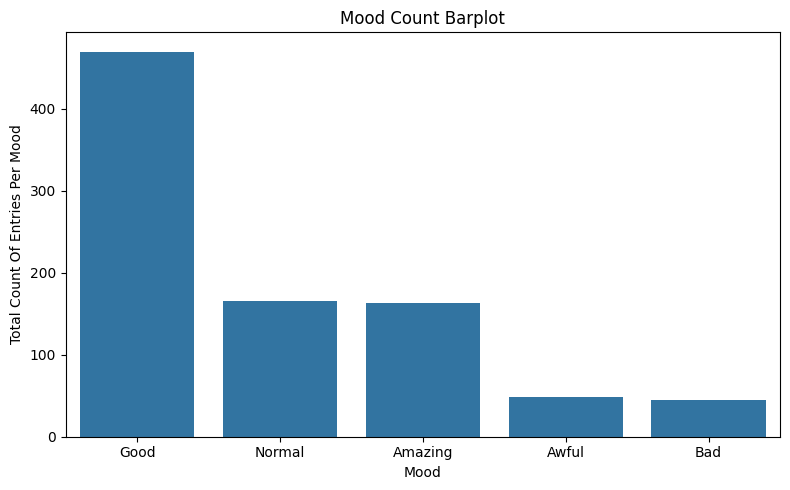

In [402]:
#(Core Goal: A bar chart showing the frequency of each mood category.)
plt.figure(figsize=(8, 5))
plt.title('Mood Count Barplot')
plt.xlabel('Mood')
plt.ylabel('Total Count Of Entries Per Mood')
sns.barplot(data=mood_counts, x='mood', y='count')
plt.savefig('mood_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [403]:
df_copy = df.copy()

In [404]:
mood_weekly_counts = df_copy.resample('W')['mood'].value_counts().unstack().fillna(0)

good_mood_weekly_counts = mood_weekly_counts[['Amazing', 'Good', 'Normal']]
good_smoothed = good_mood_weekly_counts.rolling(window=7, center=True).mean()

bad_mood_weekly_counts = mood_weekly_counts[['Bad', 'Awful']]
bad_smoothed = bad_mood_weekly_counts.rolling(window=7, center=True).mean()

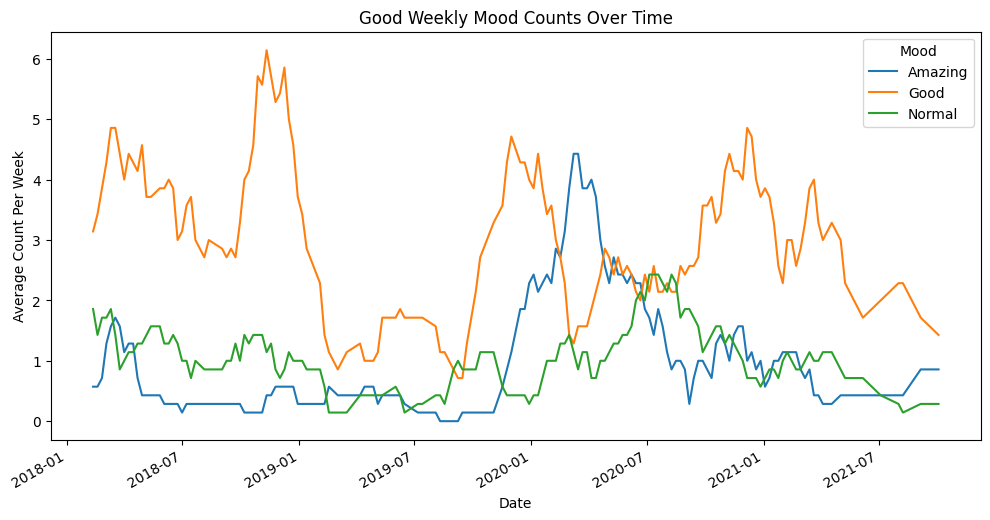

In [405]:
#(Core Goal: A line chart showing a numeric mood score or mood category over time.)
good_smoothed.plot(figsize=(12,6))
plt.title("Good Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('good_mood_linechart.png', dpi=300, bbox_inches='tight')
plt.show()


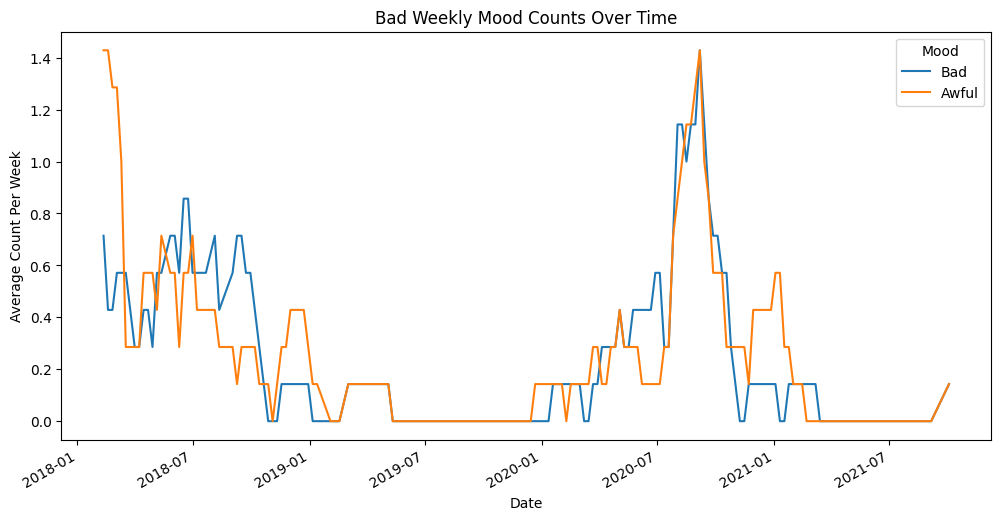

In [406]:
bad_smoothed.plot(figsize=(12,6))
plt.title("Bad Weekly Mood Counts Over Time")
plt.ylabel("Average Count Per Week")
plt.xlabel("Date")
plt.legend(title="Mood")
plt.savefig('bad_mood_linecharts', dpi=300, bbox_inches='tight')
plt.show()


In [407]:
df.head()

,weekday,sub_mood,activities,mood
datetime,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal


In [408]:
mood_map = {
    'Awful': 1,
    'Bad' : 2,
    'Normal' : 3,
    'Good' : 4,
    'Amazing' : 5
}

df['mood_encoded'] = df['mood'].map(mood_map)

In [409]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
mean_mood_score = df['mood_encoded'].mean()

print(f'Average Mood Score: {mean_mood_score:.2f}')

Average Mood Score: 3.73


In [410]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
most_common_mood = df['mood'].mode()

print(f"Most Common Mood Category: {most_common_mood[0]}")

Most Common Mood Category: Good


In [411]:
activities_explode_df = df.explode('activities')

activities_explode_df['activities'] = activities_explode_df['activities'].str.strip().str.lower()

activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [412]:
activities_explode_df['activities'].unique()

array(['reading', 'learning', 'fasting', 'walk', 'meditation', 'shower',
       'writing', 'watching series', 'good meal', 'reddit',
       'language learning', 'streaming', 'youtube', 'cooking', 'cleaning',
       'research', 'new things', 'power nap', 'documentary', 'penpal',
       'coding', 'tutorial', 'prayer', 'podcast', 'audio books', 'songs',
       'email', 'art', 'quran', 'love', 'news update', 'yoga', 'family',
       'repair', 'travel', 'exercise', 'shave', 'movies', 'holotropic',
       'designing', 'trimming', 'poetry', 'write dairy', 'jobs',
       'recording', 'party', 'dota 2', 'weight log', 'keto', 'shopping',
       'video editing', 'friends', 'kaballah', 'gaming', 'phd', 'hiking',
       'hospital'], dtype=object)

In [413]:
activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
activities_sorted.columns = ['activities', 'count']
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
top_10_activities = activities_sorted.head(10)

In [414]:
top_10_activities

,activities,count
0,youtube,770
1,streaming,710
2,good meal,586
3,audio books,553
4,reddit,542
5,meditation,541
6,watching series,539
7,walk,521
8,news update,520
9,fasting,485


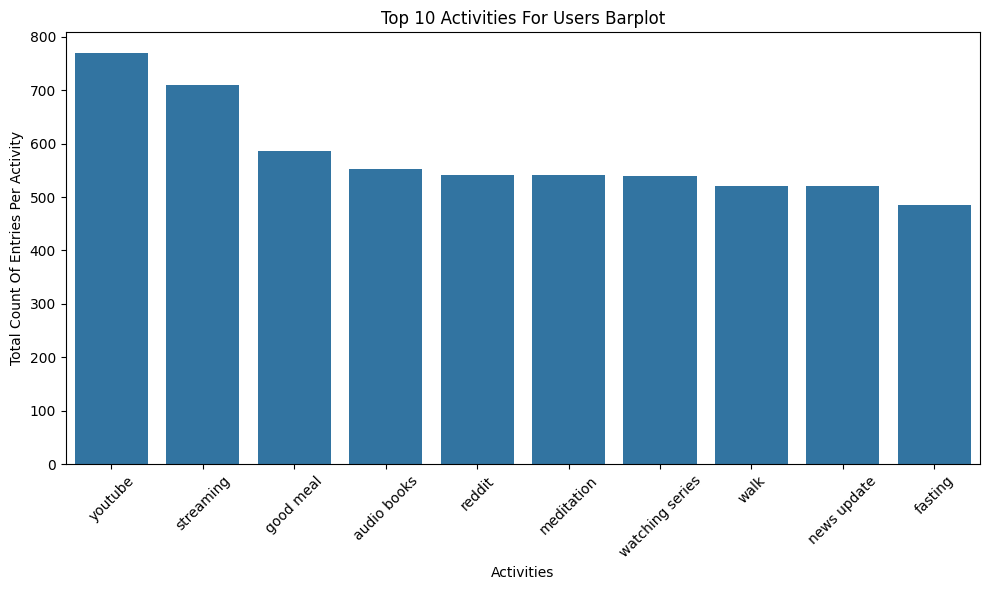

In [415]:
#Core Goal: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
plt.title('Top 10 Activities For Users Barplot')
plt.xlabel('Activities')
plt.ylabel('Total Count Of Entries Per Activity')
sns.barplot(data=top_10_activities, x='activities', y='count')
plt.xticks(rotation=45)
plt.savefig('top_10_activities_barplot.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [416]:
activities_explode_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [417]:
medium_freq_activities = activities_sorted[(activities_sorted['count'] >= 365) & (activities_sorted['count'] <= 405)]

medium_freq_activities.head(3)

,activities,count
11,power nap,400
12,prayer,398
13,penpal,388


In [418]:
activities_ascending_sorted = activities_sorted.sort_values(by='count', ascending=True)
bottom_5_activities = activities_ascending_sorted.head(5)
bottom_5_activities

,activities,count
55,video editing,3
56,hiking,3
54,hospital,4
53,party,6
52,phd,7


### Stretch Goals

In [419]:
activities_corr_list = [
    'youtube',
    'streaming',
    'good meal',
    'audio books',
    'reddit',
    'video editing',
    'hiking',
    'party',
    'phd',
    'power nap',
    'penpal'
    ]

activities_corr_df = activities_explode_df[activities_explode_df['activities'].isin(activities_corr_list)]
activities_encoded = pd.get_dummies(activities_corr_df['activities'], dtype=int)

activities_mood = pd.concat([activities_encoded, activities_corr_df['mood_encoded']], axis=1)

In [420]:
activities_corr = activities_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

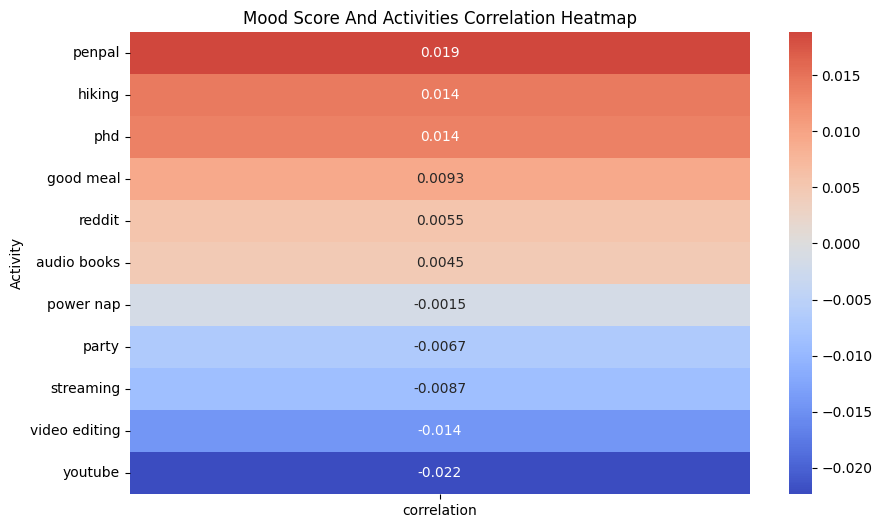

In [421]:
#Stretch Goals: At least one set of summary statistics (mean mood score, most common activities, most common mood category, etc.).
plt.figure(figsize=(10, 6))
sns.heatmap(
    activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Mood Score And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('mood_activites_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


### Creating User ID for EDA chart

In [422]:

user_df = activities_explode_df.sort_index().copy()

n_users = 30

user_df['user_id'] = (
    np.repeat(
        np.arange(1, n_users + 1),
        np.ceil(len(user_df) / n_users)
    )[:len(user_df)]
)

user_df['user_id'].value_counts().sort_index()

user_7 = user_df[user_df['user_id'] == 7]

activities_sorted = activities_explode_df['activities'].value_counts().reset_index()
activities_sorted.columns = ['activities', 'count']
activities_sorted = activities_sorted.sort_values(by='count', ascending=False)
top_10_activities = activities_sorted.head(10)

Name = "Carol Romas"

In [423]:
user_7_activities = user_7[['activities']]

In [424]:
user_7_sorted = user_7_activities.value_counts().reset_index()
user_7_sorted.columns = ['activities', 'count']
user_7_sorted = user_7_sorted.sort_values(by='count', ascending=False)

user_7_top_5_activities = user_7_sorted.head()

user_7_top_5_activities

,activities,count
0,streaming,30
1,reddit,30
2,youtube,30
3,walk,30
4,meditation,30


In [425]:
user_7_activities = [
    'youtube',
    'walk',
    'meditation',
    'streaming',
    'shower',
    'new things',
    'love',
    'family',
    'email',
    'art'
]

user_7_corr_df = user_7[user_7['activities'].isin(user_7_activities)]
user_7_activities_encoded = pd.get_dummies(user_7_corr_df['activities'], dtype=int)
user_7_mood = pd.concat([user_7_activities_encoded, user_7_corr_df['mood_encoded']], axis=1)

In [426]:
user_7_activities_corr = user_7_mood.corr()['mood_encoded'].drop('mood_encoded').sort_values(ascending=False)

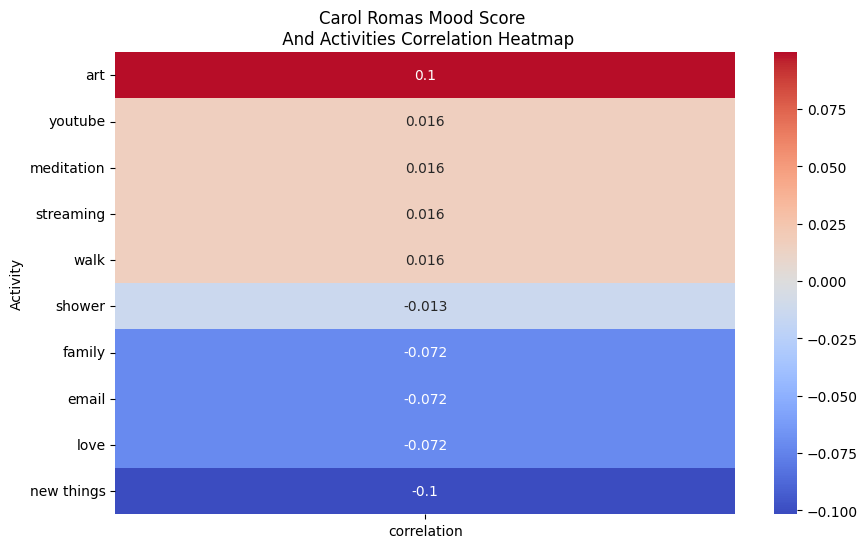

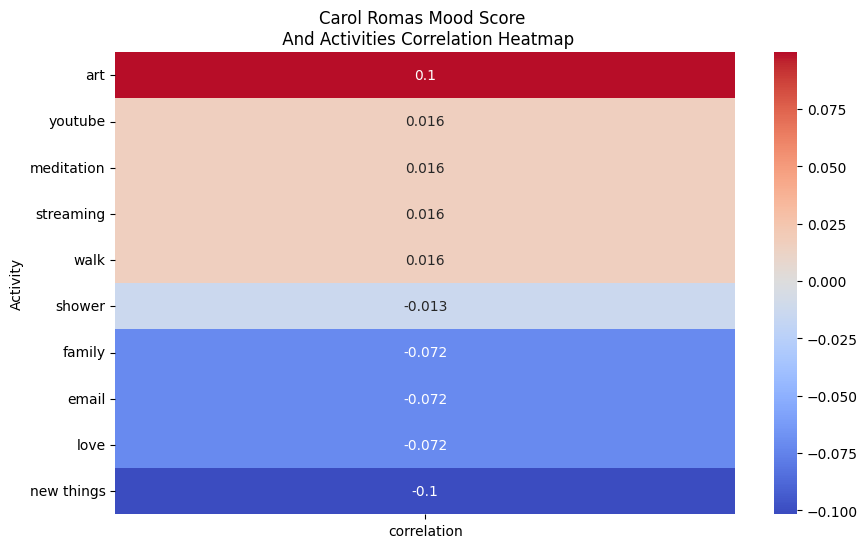

In [427]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    user_7_activities_corr.to_frame(name='correlation'),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title('Carol Romas Mood Score \n And Activities Correlation Heatmap')
plt.ylabel("Activity")

plt.savefig('carol_romas_corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [428]:
user_7_medium = user_7_sorted[(user_7_sorted['count'] >= 12) & (user_7_sorted['count'] <= 18)]

user_7_medium

,activities,count
11,shower,15


,activities,count
11,shower,15


In [429]:
user_7_sorted.tail(9)

,activities,count
28,coding,2
29,language learning,2
30,write dairy,2
31,designing,1
32,art,1
33,love,1
34,email,1
35,family,1
36,kaballah,1


,activities,count
28,coding,2
29,language learning,2
30,write dairy,2
31,designing,1
32,art,1
33,love,1
34,email,1
35,family,1
36,kaballah,1


### Weekday Charts

In [430]:
df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3


,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,"[reading , learning , fasting , walk , m...",Awful,1
2021-12-03 21:01:00,Friday,focused,"[reading , learning , prayer , fasting , ...",Good,4
2021-12-02 21:10:00,Friday,worried,"[reading , learning , prayer , fasting , ...",Bad,2
2021-12-01 21:46:00,Tuesday,Cool,"[learning , walk , streaming , youtube , ...",Amazing,5
2021-11-04 00:21:00,Sunday,wondering,"[reading , learning , prayer , fasting , ...",Normal,3


In [431]:
df_bad_weekday = df[df['mood_encoded'] <= 2]
df_good_weekday = df[df['mood_encoded'] >= 3]

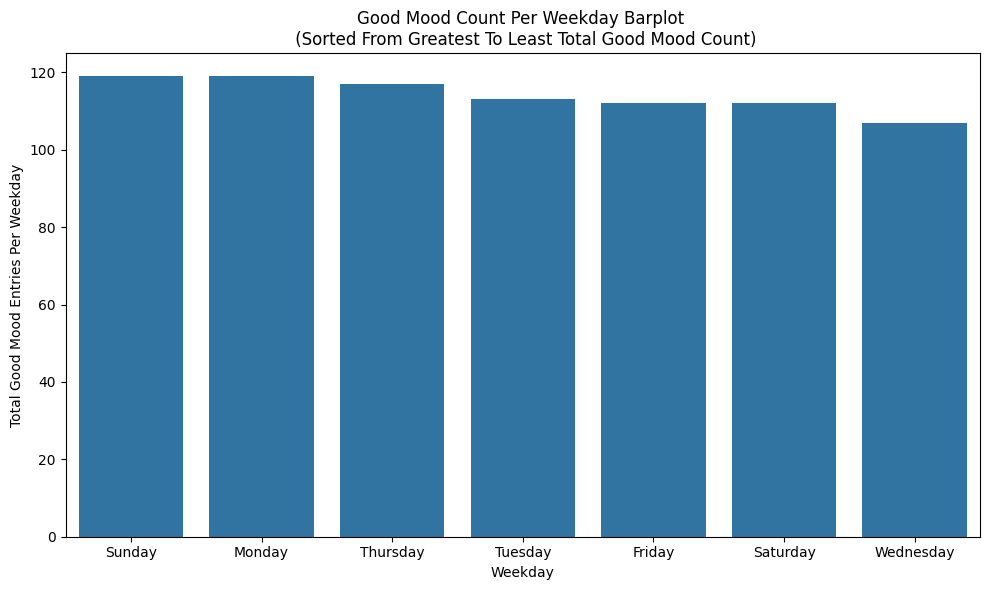

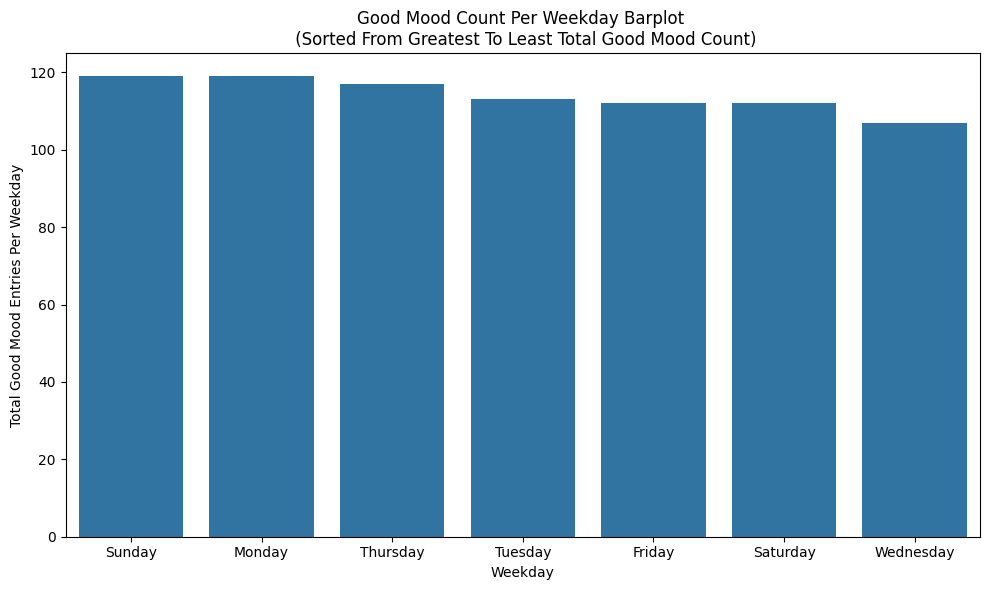

In [432]:
#Strech Goal: Mood trend by time of day or weekday using grouped line/bar charts
good_weekday_counts = df_good_weekday['weekday'].value_counts().reset_index()
good_weekday_counts.columns = ['weekday', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(data=good_weekday_counts, x='weekday', y='count')
plt.title('Good Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Good Mood Count)')
plt.ylabel('Total Good Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('good_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

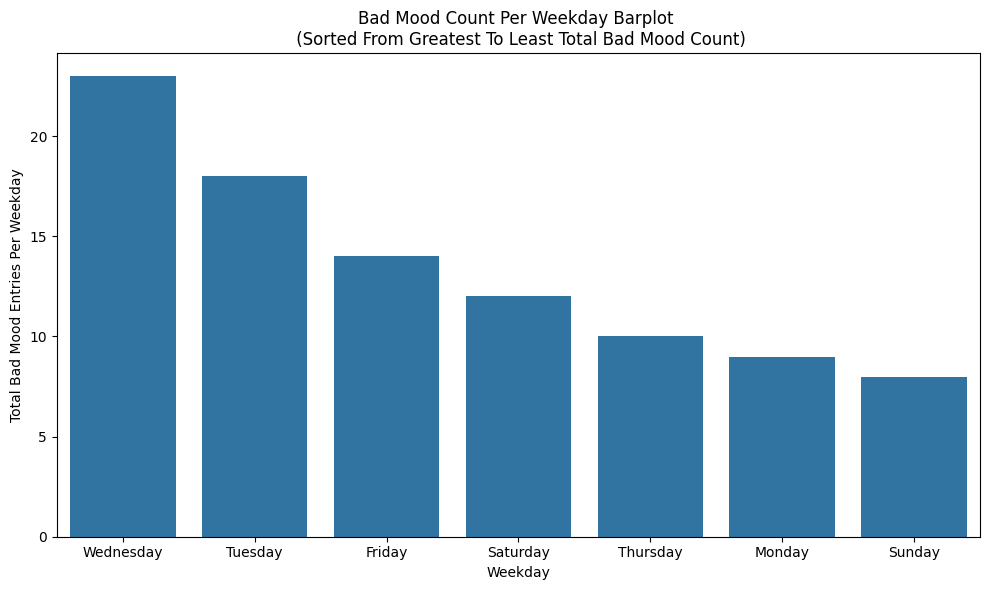

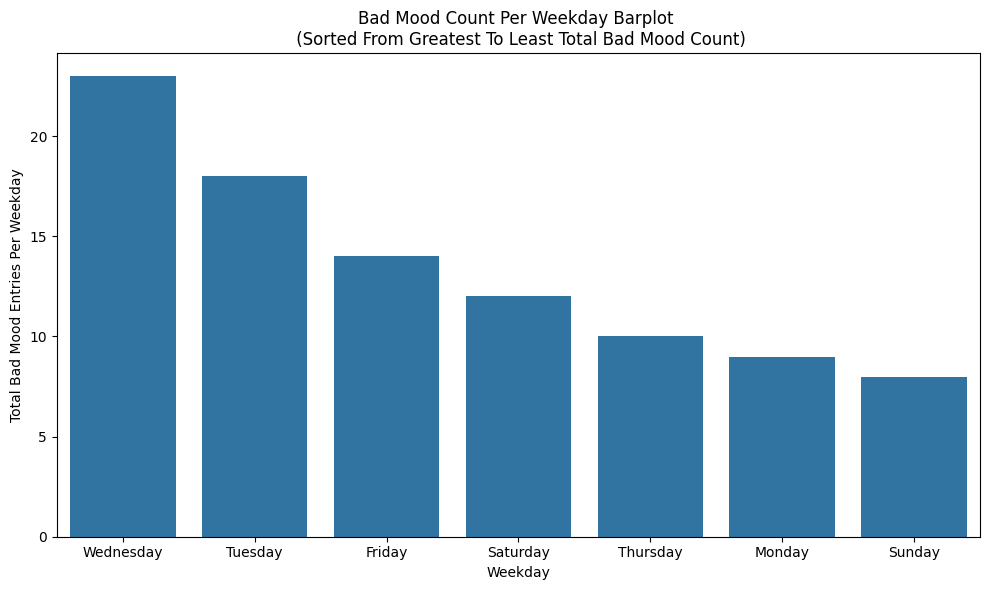

In [433]:
#Stretch Goal: Mood trend by time of day or weekday using grouped line/bar charts
bad_weekday_counts = df_bad_weekday['weekday'].value_counts().reset_index()
bad_weekday_counts.columns = ['weekday', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=bad_weekday_counts, x='weekday', y='count')
plt.title('Bad Mood Count Per Weekday Barplot \n (Sorted From Greatest To Least Total Bad Mood Count)')
plt.ylabel('Total Bad Mood Entries Per Weekday')
plt.xlabel('Weekday')

plt.savefig('bad_mood_count_weekday.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [434]:
#Stretch Goal: Add basic anomaly or pattern detection (e.g., highlight unusual mood drops or consistent weekly patterns).

#Just a concept still, very iffy if I'm going to use this or not.
def mood_alert(mood_score):
  if mood_score <= 2:
    print(f"I noticed you're having a rough day, have you tried anything to improve your mood?")

  if mood_score <= 3:
    print(f"I see you're in a good mood today.  Keep up the good work!")

  else:
    print(f"Not a valid entry")

### Creating Features For Machine Learning

In [435]:
ml_df = activities_explode_df.copy()

ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [436]:
#ml_df.drop('mood', axis=1, inplace=True)

In [437]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,Monday,angry,reading,Awful,1
2021-12-04 21:52:00,Monday,angry,learning,Awful,1
2021-12-04 21:52:00,Monday,angry,fasting,Awful,1
2021-12-04 21:52:00,Monday,angry,walk,Awful,1
2021-12-04 21:52:00,Monday,angry,meditation,Awful,1


In [438]:
weekday_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}

ml_df['weekday'] = ml_df['weekday'].map(weekday_map)

## Resampling Data

### The data looks messy so I decided not to do this time series task.

Here is the task I'm trying to solve:

Predict tomorrow’s mood rating based on the past 7 days.

In [439]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


In [440]:
ml_df_resampled = ml_df.resample('W').agg({
    'mood_encoded' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'weekday' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'sub_mood' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
    'activities' : lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
})

In [441]:
ml_df_resampled.shape

(205, 4)

(205, 4)

In [442]:
ml_df_resampled.isna().sum()

,0
mood_encoded,47
weekday,47
sub_mood,47
activities,47


,0
mood_encoded,47
weekday,47
sub_mood,47
activities,47


In [443]:
ml_df_resampled.dropna(inplace=True)

In [444]:
ml_df_resampled.isna().sum()

,0
mood_encoded,0
weekday,0
sub_mood,0
activities,0


,0
mood_encoded,0
weekday,0
sub_mood,0
activities,0


plt.figure(figsize=(10,4))
plt.plot(df_resampled.index, df_resampled['mood_encoded'])
plt.title("Daily Mood After Resampling")
plt.xlabel("Date")
plt.ylabel("Mood Score (Daily Mean)")
plt.show()


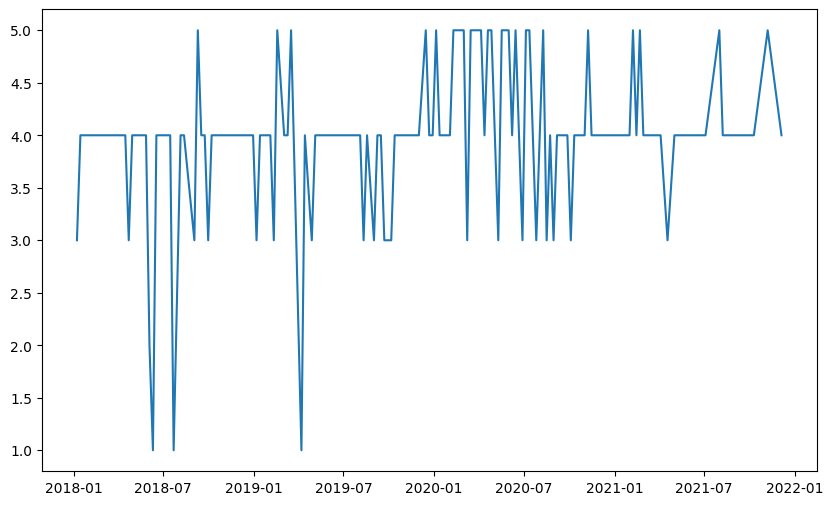

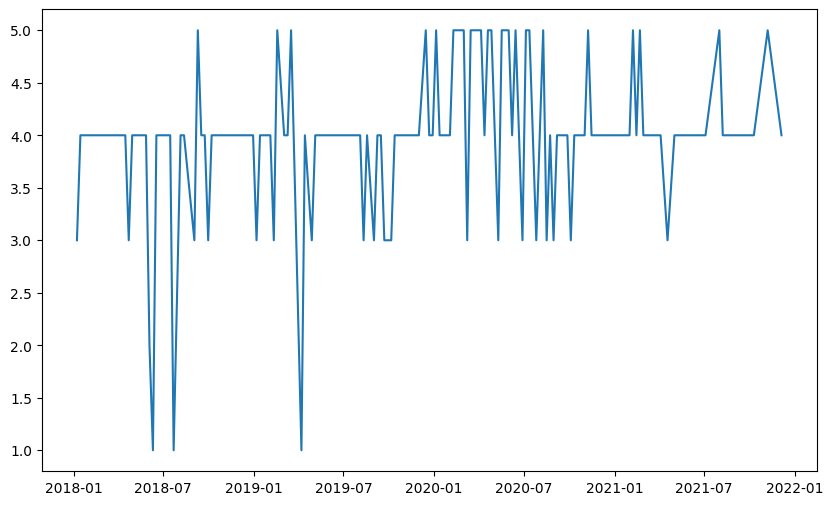

In [445]:
plt.figure(figsize=(10, 6))
plt.plot(ml_df_resampled.index, ml_df_resampled['mood_encoded'])

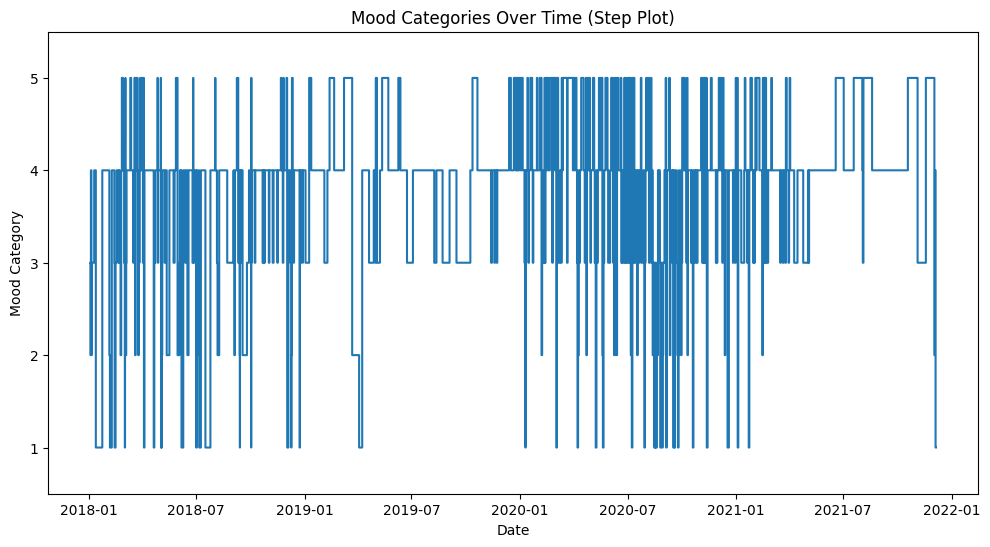

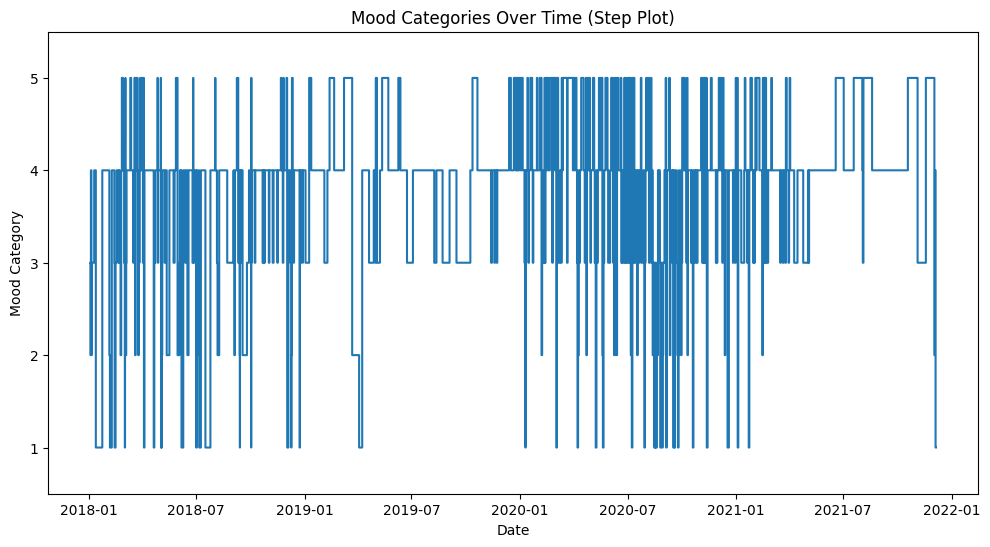

In [446]:
plt.figure(figsize=(12,6))
plt.step(ml_df.index, ml_df['mood_encoded'], where='mid')
plt.ylim(0.5, 5.5)
plt.yticks([1,2,3,4,5])
plt.title("Mood Categories Over Time (Step Plot)")
plt.xlabel("Date")
plt.ylabel("Mood Category")
plt.show()


### Stationary Test

In [447]:
stationary_test_check = adfuller(ml_df['mood_encoded'])
p_value = stationary_test_check[1]

#Print the p value of the stationary test.
print(f"Stationary Test P Value: {p_value:.2f}")

Stationary Test P Value: 0.00
Stationary Test P Value: 0.00


Conclusion:

According to the stationary test's p-value, the dataset is stationary.

### Decomposing Dataset

### Classification Task

Here is the task I'm trying to solve:

“Predict most likely mood category given today’s logged activities.”

In [448]:
ml_df.head()

,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


,weekday,sub_mood,activities,mood,mood_encoded
datetime,,,,,
2021-12-04 21:52:00,1,angry,reading,Awful,1
2021-12-04 21:52:00,1,angry,learning,Awful,1
2021-12-04 21:52:00,1,angry,fasting,Awful,1
2021-12-04 21:52:00,1,angry,walk,Awful,1
2021-12-04 21:52:00,1,angry,meditation,Awful,1


In [449]:
ml_df = ml_df.drop(['weekday', 'sub_mood'], axis=1)

In [450]:
ml_df.head()

,activities,mood,mood_encoded
datetime,,,
2021-12-04 21:52:00,reading,Awful,1
2021-12-04 21:52:00,learning,Awful,1
2021-12-04 21:52:00,fasting,Awful,1
2021-12-04 21:52:00,walk,Awful,1
2021-12-04 21:52:00,meditation,Awful,1


,activities,mood,mood_encoded
datetime,,,
2021-12-04 21:52:00,reading,Awful,1
2021-12-04 21:52:00,learning,Awful,1
2021-12-04 21:52:00,fasting,Awful,1
2021-12-04 21:52:00,walk,Awful,1
2021-12-04 21:52:00,meditation,Awful,1


In [451]:
ml_df['activities'].nunique()

57

57

In [452]:
freq_map = ml_df['activities'].value_counts().to_dict()

ml_df['activities_freq'] = ml_df['activities'].map(freq_map)

In [453]:
ml_df.columns

Index(['activities', 'mood', 'mood_encoded', 'activities_freq'], dtype='object')

Index(['activities', 'mood', 'mood_encoded', 'activities_freq'], dtype='object')

In [454]:
df['mood'].unique()

array(['Awful', 'Good', 'Bad', 'Amazing', 'Normal'], dtype=object)

array(['Awful', 'Good', 'Bad', 'Amazing', 'Normal'], dtype=object)

In [455]:
ml_df = ml_df.drop('mood_encoded', axis=1)
mood_binary_map = {
    'Awful': 0,
    'Bad' : 0,
    'Good': 1,
    'Normal' : 1,
    'Amazing': 1
}

ml_df['mood'] = ml_df['mood'].map(mood_binary_map)

In [456]:
ml_df.isna().sum()

,0
activities,0
mood,0
activities_freq,0


,0
activities,0
mood,0
activities_freq,0


In [457]:
ml_df.head()

,activities,mood,activities_freq
datetime,,,
2021-12-04 21:52:00,reading,0,273
2021-12-04 21:52:00,learning,0,241
2021-12-04 21:52:00,fasting,0,485
2021-12-04 21:52:00,walk,0,521
2021-12-04 21:52:00,meditation,0,541


,activities,mood,activities_freq
datetime,,,
2021-12-04 21:52:00,reading,0,273
2021-12-04 21:52:00,learning,0,241
2021-12-04 21:52:00,fasting,0,485
2021-12-04 21:52:00,walk,0,521
2021-12-04 21:52:00,meditation,0,541


mood_counts = df['mood'].value_counts().sort_index()
mood_percent = df['mood'].value_counts(normalize=True).sort_index() * 100
import matplotlib.pyplot as plt

mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Class Distribution of Mood")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


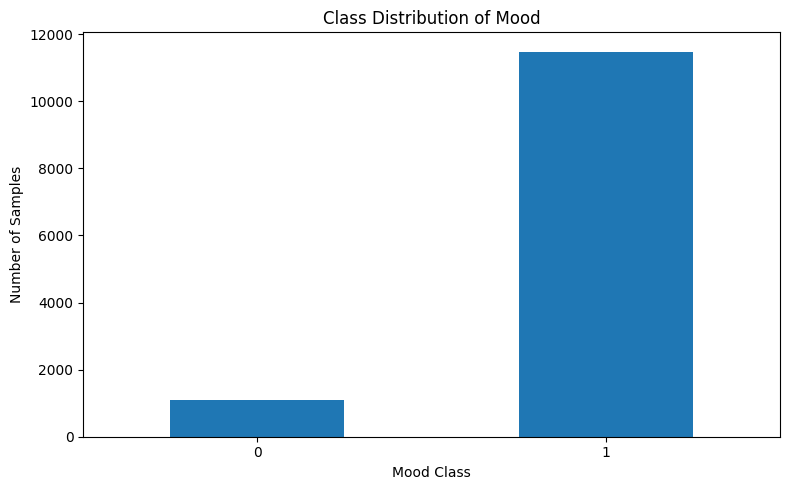

In [481]:
mood_counts = ml_df['mood'].value_counts().sort_index()
mood_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Class Distribution of Mood")
plt.xlabel("Mood Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Threshold Adjustment Function

In [482]:
#Create function to adjust the threshold.
def custom_predict(model, X, threshold):
    y_probs = model.predict_proba(X)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    return y_pred

In [ ]:
optimal_threshold = 0.5
best_f1 = 0

### Splitting The Data

In [458]:
y = ml_df['mood']

X = ml_df[['activities_freq']]

In [459]:
state = np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

In [460]:
X_train.isna().sum()

,0
activities_freq,0


,0
activities_freq,0


In [461]:
X_test.isna().sum()

,0
activities_freq,0


,0
activities_freq,0


In [462]:
y_train.isna().sum()

np.int64(0)

np.int64(0)

In [463]:
y_test.isna().sum()

np.int64(0)

np.int64(0)

In [464]:
def prediction_results(model, X, y, dataset_name="Dataset", average='macro'):
    y_pred = model.predict(X)

    f1 = f1_score(y, y_pred, average=average)

    print(f"\n{dataset_name} Results")
    print("-" * 30)
    print(f"F1 Score ({average}): {f1:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y, y_pred))

    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    return f1


### Logisitc Regression Model

(May use this for f1 score)
f1 = f1_score(y_test, y_pred, average='macro')

In [465]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

LogisticRegression()

In [466]:
lr_train_pred_f1 = prediction_results(lr, X_train, y_train, dataset_name="Training Set", average='macro')


Training Set Results
------------------------------
F1 Score (macro): 0.4780

Confusion Matrix:
[[   0  847]
 [   0 9206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.92      1.00      0.96      9206

    accuracy                           0.92     10053
   macro avg       0.46      0.50      0.48     10053
weighted avg       0.84      0.92      0.88     10053



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Results
------------------------------
F1 Score (macro): 0.4780

Confusion Matrix:
[[   0  847]
 [   0 9206]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       847
           1       0.92      1.00      0.96      9206

    accuracy                           0.92     10053
   macro avg       0.46      0.50      0.48     10053
weighted avg       0.84      0.92      0.88     10053



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest Classifier

In [467]:
rf = RandomForestClassifier(random_state=state)

rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "max_features": ["sqrt", 0.5]
}

In [468]:
rf_gsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 400]},
             scoring='f1_macro', verbose=1)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 0.5],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [200, 400]},
             scoring='f1_macro', verbose=1)

In [469]:
print(f"Random Forest Classifier Model Best Hyperparameters: {rf_gsearch.best_params_}")
print(f"Random Forest Classifier Model Best F1 Score: {rf_gsearch.best_score_:.2f}")

Random Forest Classifier Model Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classifier Model Best F1 Score: 0.48


In [470]:
rf = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [471]:
rf_train_pred_f1 = prediction_results(rf, X_train, y_train, dataset_name="Training Set", average='macro')



Training Set Results
------------------------------
F1 Score (macro): 0.4804

Confusion Matrix:
[[   2  845]
 [   1 9205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       847
           1       0.92      1.00      0.96      9206

    accuracy                           0.92     10053
   macro avg       0.79      0.50      0.48     10053
weighted avg       0.89      0.92      0.88     10053


Training Set Results
------------------------------
F1 Score (macro): 0.4804

Confusion Matrix:
[[   2  845]
 [   1 9205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       847
           1       0.92      1.00      0.96      9206

    accuracy                           0.92     10053
   macro avg       0.79      0.50      0.48     10053
weighted avg       0.89      0.92      0.88     10053



### Gradient Boost Classifier Model

In [472]:
gbc = GradientBoostingClassifier(random_state=state)

In [474]:
gbc_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
    "subsample": [0.8, 1.0],
    "max_features": [None, "sqrt"],
}

In [475]:
gbc_gsearch = GridSearchCV(
    estimator=gbc,
    param_grid=gbc_param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
    )

gbc_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='f1_macro', verbose=1)

In [476]:
print(f"Gradient Boost Classifier Model Best Hyperparameters: {gbc_gsearch.best_params_}")
print(f"Gradient Boost Classifier Model Best F1 Score: {gbc_gsearch.best_score_:.2f}")

Gradient Boost Classifier Model Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boost Classifier Model Best F1 Score: 0.48


In [477]:
gbc = GradientBoostingClassifier(
    learning_rate=0.05,
    max_depth=2,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    subsample=0.8)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, subsample=0.8)

In [479]:
gbc_train_pred_f1 = prediction_results(gbc, X_train, y_train, dataset_name="Training Set", average='macro')


Training Set Results
------------------------------
F1 Score (macro): 0.4804

Confusion Matrix:
[[   2  845]
 [   1 9205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00       847
           1       0.92      1.00      0.96      9206

    accuracy                           0.92     10053
   macro avg       0.79      0.50      0.48     10053
weighted avg       0.89      0.92      0.88     10053



In [ ]:
best_f1 = -1
optimal_threshold = 0.5

for threshold in thresholds:
    y_pred_train = (y_prob_train >= threshold).astype(int)
    current_f1 = f1_score(y_train, y_pred_train, average="macro")
    if current_f1 > best_f1:
        best_f1 = current_f1
        optimal_threshold = threshold

print("Optimal threshold:", round(optimal_threshold, 2))
print("Best macro F1:", round(best_f1, 3))


NameError: name 'thresholds' is not defined